In [1]:
'''
Code adapted from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
'''
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

from mnist import MnistClassifier
import numpy as np


batch_size = 128
num_classes = 10
num_epoch = 1

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
num_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()




Using Theano backend.


In [2]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

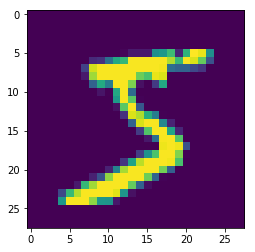

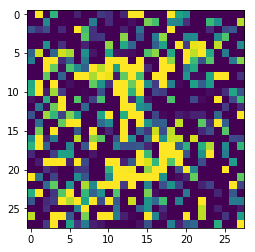

0


In [3]:
from skimage.util import random_noise
from matplotlib import pyplot as plt

X_train_noised = np.zeros_like(X_train)
for i in range(len(X_train)):
    X_train_noised[i] = random_noise(X_train[i], mode='gaussian', var=0.5, seed=None, clip=True)
    
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train_noised[0])
plt.show()
print min(y_test)

In [4]:
#X_train = X_train_noised

In [5]:
#reshape for theano
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: #reshape for tensorflow
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



#10% for validation
nb_val = int(0.1 * len(y_train))
X_val, y_val = X_train[-nb_val:, :], y_train[-nb_val:]
X_train, y_train = X_train[0:-nb_val, :], y_train[0:-nb_val]


# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_val = np_utils.to_categorical(y_val, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('Training samples: ', X_train.shape[0])
print('Validation samples: ', X_val.shape[0])
print('Test samples: ', X_test.shape[0])

('X_train shape:', (54000, 1, 28, 28))
('Y_train shape:', (54000, 10))
('Training samples: ', 54000)
('Validation samples: ', 6000)
('Test samples: ', 10000)


In [6]:
model = MnistClassifier(num_classes, input_shape)

model.fit(X_train, Y_train, X_val, Y_val, batch_size, num_epoch)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 99s - loss: 0.3273 - acc: 0.8984 - val_loss: 0.0526 - val_acc: 0.9860


In [7]:
score = model.eval(X_test, Y_test, 1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 15s    
('Test score:', 0.050895086298429579)
('Test accuracy:', 0.98370000000000002)


In [8]:
pred_prob = model.eval_by_class(X_test)
preds = np.zeros_like(pred_prob)
preds[np.arange(len(pred_prob)), pred_prob.argmax(1)] = 1
print np.mean((preds == Y_test), axis=0)*100

[ 99.75  99.76  99.7   99.61  99.8   99.7   99.8   99.52  99.61  99.49]
